Maxime BLANCHON

#### *Programmation sur Grille de Calcul - Générateurs de Variables Aléatoires*

# TP3 - Méthodes de Monte-Carlo

## Exercice 1

Pi : 3.141592653589793, approximation : 3.1439


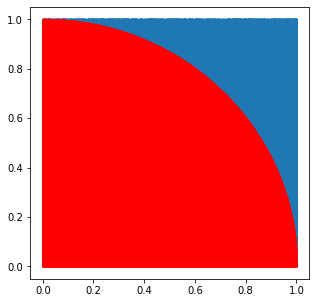

3.1439

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from typing import Callable, List
from itertools import repeat
import seaborn as sns
from scipy.integrate import dblquad

SIZES = [100, 1000, 10_000, 50_000, 100_000, 500_000, 1_000_000]

def hit_or_miss_plot(N=1000):
    x = np.random.uniform(size=N)
    y = np.random.uniform(size=N)
    
    inside_bool = (x*x)+(y*y)<1
    
    approx_pi = 4*np.sum(inside_bool)/N
    print("Pi : {}, approximation : {}".format(np.pi, approx_pi))
    
    x_in = x[inside_bool]
    y_in = y[inside_bool]
    
    plt.figure(figsize=[5,5])
    plt.scatter(x, y, s=1)
    plt.scatter(x_in, y_in, color="r", s=1)
    plt.show()
    
    return approx_pi


def hit_or_miss(N=1000):
    x = np.random.uniform(size=N)
    y = np.random.uniform(size=N)
    
    inside_bool = (x*x)+(y*y)<1
    
    approx_pi = 4*np.sum(inside_bool)/N
    return approx_pi
    
hit_or_miss_plot(1_000_000)

In [2]:
def plot_error_function(sizes: List[int], approximations: List[float], errors: List[float]):
    sizes_log = np.log(SIZES)
    plt.scatter(sizes_log, errors, facecolors='none', edgecolors='b', linewidths=2)
    plt.plot(sizes_log, approximations, color='r')
    plt.scatter(sizes_log, approximations, facecolors='none', edgecolors='r', linewidths=2)

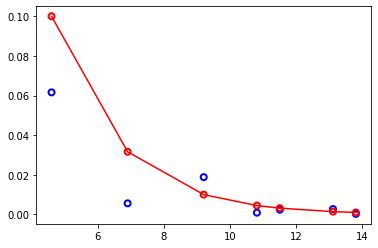

In [3]:
approximations = []
errors = []

for size in SIZES:
    approx = hit_or_miss(size)
    errors.append(abs(approx - np.pi))
    approximations.append(1/sqrt(size))

plot_error_function(SIZES, approximations, errors)

## Exercice 2



1 - La valeur de l'intégrale trouvée par un changement de variable $u=arcsin(x)$ et $du = \frac {1} {\sqrt {1 - x^2}}$, nous trouvons $J = 0.602845$.

In [4]:
# 2)
def f(x) -> float:
    return (1 / 2) * (np.exp(np.arcsin(x))) * (x / np.sqrt(1 - (x * x)))

def monte_carlo(a: float, b: float, n: int, f: Callable) -> float:
    mc_sum = 0
    for i in range(n):
        mc_sum += f(np.random.uniform(a, b))
    return (b - a) * mc_sum / n

# 3)
f_monte_carlo = []
for n in SIZES:
    res = monte_carlo(0.1, 0.9, n, f)
    f_monte_carlo.append(res)
    print(f'Nombre de valeurs simulées n = {n}, estimation de J = {res}')

Nombre de valeurs simulées n = 100, estimation de J = 0.6386058563403181
Nombre de valeurs simulées n = 1000, estimation de J = 0.5851009250826419
Nombre de valeurs simulées n = 10000, estimation de J = 0.6036898027300646
Nombre de valeurs simulées n = 50000, estimation de J = 0.6027320924883365
Nombre de valeurs simulées n = 100000, estimation de J = 0.602083782480995
Nombre de valeurs simulées n = 500000, estimation de J = 0.6039287664093395
Nombre de valeurs simulées n = 1000000, estimation de J = 0.6029280496665812


In [5]:
# 4
def formule_des_rectangles(a: float, b: float, n: int, f: Callable):
    rec_sum = 0
    h = (b - a) / n
    
    for k in range(n-1):
        rec_sum += f(a + k * h)
        
    return h * rec_sum

f_rectangle = []
for n in SIZES:
    res = formule_des_rectangles(0.1, 0.9, n, f)
    f_rectangle.append(res)
    print(f'Nombre de valeurs simulées n = {n}, estimation de J = {res}')

Nombre de valeurs simulées n = 100, estimation de J = 0.5667942925845
Nombre de valeurs simulées n = 1000, estimation de J = 0.5990893619507717
Nombre de valeurs simulées n = 10000, estimation de J = 0.6024682238648716
Nombre de valeurs simulées n = 50000, estimation de J = 0.6027699557026537
Nombre de valeurs simulées n = 100000, estimation de J = 0.6028076882127177
Nombre de valeurs simulées n = 500000, estimation de J = 0.6028378767870706
Nombre de valeurs simulées n = 1000000, estimation de J = 0.6028416505193059


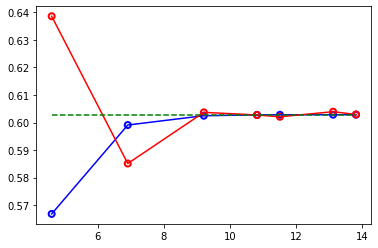

In [6]:
J_VALUE = 0.602845

def plot_values(sizes: List[int], f1: List[float], f2: List[float]) -> None:
    sizes_log = np.log(SIZES)
    plt.plot(sizes_log, f1, color='blue')
    plt.scatter(sizes_log, f1, facecolors='none', edgecolors='b', linewidths=2)
    plt.plot(sizes_log, f2, color='red')
    plt.scatter(sizes_log, f2, facecolors='none', edgecolors='r', linewidths=2)
    droite = list(repeat(J_VALUE, len(SIZES)))
    plt.plot(sizes_log, droite, linestyle='dashed', color='green')
    
plot_values(SIZES, f_rectangle, f_monte_carlo)

La méthode de quadrature converge plus rapidement.

Nombre de tirages n = 100, erreur numérique = 0.08994493431620143
Nombre de tirages n = 1000, erreur numérique = 0.01444247644789598
Nombre de tirages n = 10000, erreur numérique = 0.007343995090723254
Nombre de tirages n = 50000, erreur numérique = 0.0027559742691212197
Nombre de tirages n = 100000, erreur numérique = 0.0006371683456344313
Nombre de tirages n = 500000, erreur numérique = 0.00030072291645177884
Nombre de tirages n = 1000000, erreur numérique = 0.00010882126973521533


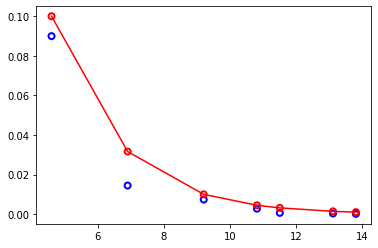

In [7]:
# 5
approximations = []
errors = []

for size in SIZES:
    approx =  monte_carlo(0.1, 0.9, size, f)
    error = abs(approx - J_VALUE)
    errors.append(error)
    approximations.append(1/sqrt(size))
    print(f'Nombre de tirages n = {size}, erreur numérique = {error}')

plot_error_function(SIZES, approximations, errors)

In [26]:
# 6
def batch(m, n):
    batch_len = int(n / m)
    batches = []
    
    for i in range(m):
        batches.append(monte_carlo(0.1, 0.9, batch_len, f))
        
    return batches, sum(batches) / m

batches, avg = batch(5000, 1_000_000)
print('moyenne = ', avg)

moyenne =  0.6024848119087807


/home/maxime/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


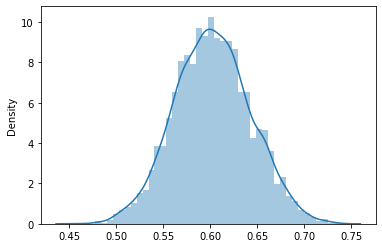

In [24]:
sns.distplot(batches)

= on se rapproche du théorème central limite

## Exercice 3

1 - La valeur de l'intégrale I est 0.159491.

In [10]:
# 2
def y_func(x: int, y: int) -> float:
    return x * y * np.sin(1 / (x * y))**2

def monte_carlo_v2(a: float, b: float, n: int, f: Callable) -> float:
    mc_sum = 0
    for i in range(n):
        mc_sum += f(np.random.uniform(a, b), np.random.uniform(a, b))
    return (b - a) * mc_sum / n

# 3
f_monte_carlo = []
for n in SIZES:
    res = monte_carlo_v2(0, 1, n, y_func)
    f_monte_carlo.append(res)
    print(f'Nombre de valeurs simulées n = {n}, estimation de J = {res}')

Nombre de valeurs simulées n = 100, estimation de J = 0.12211235632548757
Nombre de valeurs simulées n = 1000, estimation de J = 0.16695981232976737
Nombre de valeurs simulées n = 10000, estimation de J = 0.1569170246623765
Nombre de valeurs simulées n = 50000, estimation de J = 0.1599462263933137
Nombre de valeurs simulées n = 100000, estimation de J = 0.15995631216516845
Nombre de valeurs simulées n = 500000, estimation de J = 0.16014185792061245
Nombre de valeurs simulées n = 1000000, estimation de J = 0.1594556312965931


In [27]:
# 4

def integrale2(N):
    dx = 1/N
    def g(i,j):
        return (i*j*dx*dx)*(np.sin(1/(i*j*dx*dx)))**2
    g = np.fromfunction(g,(N,N))
    clean_x = g[np.isnan(g)==False]
    return abs(clean_x.sum()*(1/N)**2)
integrale2(10000)

<ipython-input-27-1e72d43cb345>:6: RuntimeWarning: divide by zero encountered in true_divide
  return (i*j*dx*dx)*(np.sin(1/(i*j*dx*dx)))**2
<ipython-input-27-1e72d43cb345>:6: RuntimeWarning: invalid value encountered in sin
  return (i*j*dx*dx)*(np.sin(1/(i*j*dx*dx)))**2


0.15945294248866315

Nombre de tirages n = 100, erreur numérique = 0.016193199870067565
Nombre de tirages n = 1000, erreur numérique = 0.002178218577798041
Nombre de tirages n = 10000, erreur numérique = 0.0010669292371349726
Nombre de tirages n = 50000, erreur numérique = 0.001081207226382469
Nombre de tirages n = 100000, erreur numérique = 0.0007318471570544882
Nombre de tirages n = 500000, erreur numérique = 6.507902002919619e-05
Nombre de tirages n = 1000000, erreur numérique = 6.68268297646657e-05


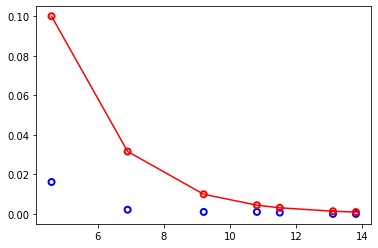

In [12]:
# 5
I_VALUE = 0.159491
approximations = []
errors = []

for size in SIZES:
    approx =  monte_carlo_v2(0, 1, size, y_func)
    error = abs(approx - I_VALUE)
    errors.append(error)
    approximations.append(1/sqrt(size))
    print(f'Nombre de tirages n = {size}, erreur numérique = {error}')

plot_error_function(SIZES, approximations, errors)

In [13]:
#6 
def batch(m, n):
    batch_len = int(n / m)
    batches = []
    
    for i in range(m):
        batches.append(monte_carlo_v2(0, 1, batch_len, y_func))
        
    return batches, sum(batches) / m

batches, avg = batch(5000, 1_000_000)
print('moyenne = ', avg)

moyenne =  0.15966511685855117


/home/maxime/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


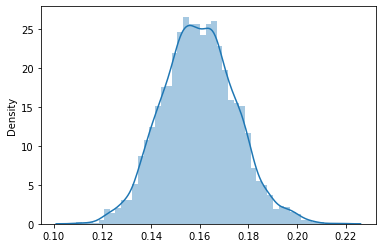

In [14]:
sns.distplot(batches)